# Overview of data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("E:\Parsa\project of data analytics\project3(Medical Insurance Price Prediction)\Medical_insurance.csv")
df = pd.DataFrame(data)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
nan_count = df.isnull().sum()
nan_count

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df["region"].unique()
df_copy = df.copy()

In [7]:
sex_mapping = {"female":0 , "male":1}
region_mapping = {"southwest":0,"southeast":1,"northwest":2 , "northeast":3}
smoker_mapping = {"yes":0,"no":1}

df_copy["sex"] = df_copy["sex"].replace(sex_mapping)
df_copy["region"] = df_copy["region"].replace(region_mapping)
df_copy["smoker"] = df_copy["smoker"].replace(smoker_mapping)
df_copy

C:\Users\Admin\AppData\Local\Temp\ipykernel_17504\3791193735.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy["sex"] = df_copy["sex"].replace(sex_mapping)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17504\3791193735.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy["region"] = df_copy["region"].replace(region_mapping)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17504\3791193735.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavi

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
2767,47,0,45.320,1,1,1,8569.86180
2768,21,0,34.600,0,1,0,2020.17700
2769,19,1,26.030,1,0,2,16450.89470
2770,23,1,18.715,0,1,2,21595.38229


In [8]:
def categorize_age(age):
    if  13<=age<=19:
        return "Teenager"
    elif  20<=age<=35:
        return "Young Adult"
    elif  36<=age<=60:
        return "Adult"
    else:
        return "Senior"
    
    
df["categorize_age"] = df["age"].apply(categorize_age)
#df_copy["categorize_age"] = df_copy["age"].apply(categorize_age)
df

,age,sex,bmi,children,smoker,region,charges,categorize_age
0,19,female,27.900,0,yes,southwest,16884.92400,Teenager
1,18,male,33.770,1,no,southeast,1725.55230,Teenager
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult
...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,Adult
2768,21,female,34.600,0,no,southwest,2020.17700,Young Adult
2769,19,male,26.030,1,yes,northwest,16450.89470,Teenager
2770,23,male,18.715,0,no,northwest,21595.38229,Young Adult


In [9]:
def categorize_bmi(bmi):
    if  bmi<18.5:
        return "underweight"
    elif  18.5<=bmi<24.9:
        return "healthy range"
    elif  24.9<=bmi<29.9:
        return "overweight"
    elif 29.9<=bmi<39.9:
        return "obesity"
    elif bmi>=40 :
        return "severe obesity"
    
    
df["categorize_bmi"] = df["bmi"].apply(categorize_bmi)

#df_copy["categorize_bmi"] = df_copy["bmi"].apply(categorize_bmi)

df

,age,sex,bmi,children,smoker,region,charges,categorize_age,categorize_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,Teenager,overweight
1,18,male,33.770,1,no,southeast,1725.55230,Teenager,obesity
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,obesity
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult,healthy range
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult,overweight
...,...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,Adult,severe obesity
2768,21,female,34.600,0,no,southwest,2020.17700,Young Adult,obesity
2769,19,male,26.030,1,yes,northwest,16450.89470,Teenager,overweight
2770,23,male,18.715,0,no,northwest,21595.38229,Young Adult,healthy range


<Axes: xlabel='sex'>

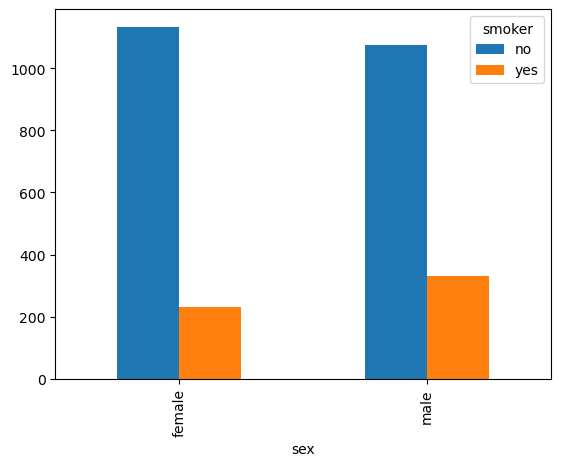

In [10]:
grouped_data = df.groupby(['sex', 'smoker']).size().unstack(fill_value=0)
grouped_data.plot(kind="bar")

In [24]:
import plotly.express as px



fig = px.bar(
    df,
    x='categorize_bmi',
    y='charges',
    color='categorize_age',
    barmode='group',
    facet_col='sex',
    facet_row='smoker',
    opacity=1.0,  
    color_discrete_sequence=px.colors.qualitative.Bold,  
    title='Charges by BMI Category and Smoking Status',
    height=600
)

fig.update_layout(
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',  
    paper_bgcolor='rgba(0,0,0,0)'  
)

fig.show()


In [25]:
fig = px.bar(
    df,
    x='categorize_age',
    y='charges',
    color='categorize_bmi',
    barmode='group',
    facet_col='sex',
    facet_row='smoker',
    opacity=1.0,  # عدم شفافیت
    color_discrete_sequence=px.colors.qualitative.Bold,  # پالت رنگی واضح‌تر
    title='Charges by BMI Category and Smoking Status',
    height=600
)

fig.update_layout(
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',  # پس‌زمینه شفاف
    paper_bgcolor='rgba(0,0,0,0)'  # فضای کلی شفاف
)

fig.show()


<Axes: xlabel='categorize_bmi'>

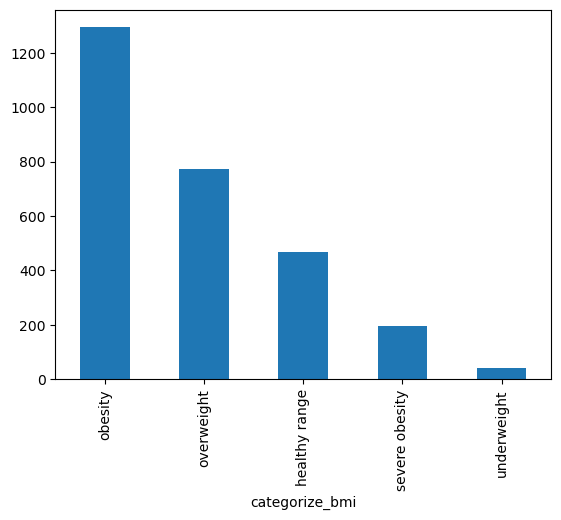

In [26]:

de = df["categorize_bmi"].value_counts()
de.plot(kind="bar")


# Prediction Charges

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_copy[["age","bmi","charges"]] = scaler.fit_transform(df_copy[["age","bmi","charges"]])
df_copy


,age,sex,bmi,children,smoker,region,charges
0,-1.428353,0,-0.457114,0,0,0,0.298245
1,-1.499381,1,0.500731,1,1,1,-0.949483
2,-0.789099,1,0.375085,3,1,1,-0.725285
3,-0.433959,1,-1.304814,0,1,2,0.717976
4,-0.504987,1,-0.297201,0,1,2,-0.773238
...,...,...,...,...,...,...,...
2767,0.560436,0,2.385417,1,1,1,-0.386146
2768,-1.286297,0,0.636167,0,1,0,-0.925233
2769,-1.428353,1,-0.762253,1,0,2,0.262521
2770,-1.144240,1,-1.955887,0,1,2,0.685951


In [17]:
from sklearn.model_selection import train_test_split

X = df_copy.drop(columns=["charges"])
Y = df_copy["charges"]

x_train , x_test , y_train , y_test = train_test_split(X ,Y , test_size=0.2 , random_state=42)



## Bagging  Model

In [18]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

bagging_model = BaggingRegressor(base_estimator = DecisionTreeRegressor() ,n_estimators=50 , random_state=20)

bagging_model.fit(x_train,y_train)

y_hat = bagging_model.predict(x_test)
mse = mean_squared_error(y_test,y_hat)
r2 = r2_score(y_test,y_hat)
mae = mean_absolute_error(y_test , y_hat)

print(f"mse_bagging_model:{mse}\n r2_bagging_model:{r2}\n mae_bagging_model:{mae}")


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



mse_bagging_model:0.05111275541668753
 r2_bagging_model:0.9508416722176787
 mae_bagging_model:0.10797240185944974


## Random Forest Model

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100 , max_depth=10 , random_state=30)

rf_model.fit(x_train , y_train)

y_hat = rf_model.predict(x_test)

mse = mean_squared_error(y_test,y_hat)
r2 = r2_score(y_test,y_hat)
mae = mean_absolute_error(y_test , y_hat)

print(f"mse_rf_model:{mse}\n r2_rf_model:{r2}\n mae_rf_model:{mae}")



mse_rf_model:0.0656678526087858
 r2_rf_model:0.9368431265936031
 mae_rf_model:0.12934551001952727


<BarContainer object of 6 artists>

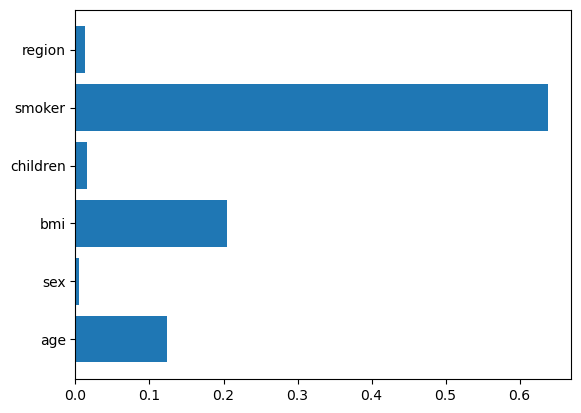

In [20]:
feature_importance = rf_model.feature_importances_
feature_name = X.columns
plt.barh(feature_name , feature_importance)

## Gradient Boosting Model

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100 , learning_rate=0.1 , max_depth=3 , random_state=10)

gb_model.fit(x_train , y_train)

y_hat = gb_model.predict(x_test)

mse = mean_squared_error(y_test,y_hat)
r2 = r2_score(y_test,y_hat)
mae = mean_absolute_error(y_test , y_hat)

print(f"mse_gb_model:{mse}\n r2_gb_model:{r2}\n mae_gb_model:{mae}")



mse_gb_model:0.12765429034929834
 r2_gb_model:0.8772268996916248
 mae_gb_model:0.1865623696508359


## XGBoost Model

In [22]:

from xgboost  import XGBRegressor

xgb_model = XGBRegressor(n_estimator = 100 , learning_rate = 0.1 , max_depth = 3 , random_state = 50)

xgb_model.fit(x_train , y_train)

y_hat = xgb_model.predict(x_test)

mse = mean_squared_error(y_test,y_hat)
r2 = r2_score(y_test,y_hat)
mae = mean_absolute_error(y_test , y_hat)

print(f"mse_xgb_model:{mse}\n r2_xgb_model:{r2}\n mae_xgb_model:{mae}")


mse_xgb_model:0.137264718545996
 r2_xgb_model:0.8679839509292209
 mae_xgb_model:0.195345529775189


c:\Users\Admin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[10:04:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used.


